# Curve fitting 

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

# Introduction
In many engineering applications, data are only available at discrete locations. You are often required to estimate the values in between discrete points. To do that, the most common approach is to fit a curve (function) with available data points and then use the fitted curve to get values at other locations. This computing method is called curve fitting.

There are two categories of curve fitting:
- regression when the fitted curve only follow the general pattern or trend of the data points. In this category, there is no need to force the fitted curve to go through eacho and every data points. The reason might be that these data points are not accurate anyway. These data may come from measurements or observations, which inevitably have some error. 
- interpolation when the fitted curve pass exactly through the data points. This category of methods of course applies to the case where the data points are exact. For example, if these data points are calculated from an analytical solution, then there are exact. 

<img src="regression_vs_interpolation.png" width="400"/>
<h3 align="center">Figure. Regression vs. interpolation.</h3> 

There are many applications for curve fitting in civil and environmental engineering. 
- One application is hypothesis testing, e.g., whether a fluid is Newtonian, i.e., whether shear stress and strain rate of a fluid are linearly related. To test this hyporthesis, we can perform experiments and obtain shear stress and strain rate data. Then we can try to fit a linear curve through the data points and see how good the linear fit is. There are also many fluids which are non-Newtonian. The relationship between shear stress and strain rate is non-linear. To get parameters for these nonlinear relationships, curve fitting is often used. 
- Another application is to judge how good a computer model result in comparison with reality. As described in the introduction chapter, many computer models used in CEE are based on mathematical models with assumptions and simplifications. How good are they? The only way is to perform some reality check, i.e., compare their results with real measurement data. The next question naturally is how to measure the fitness or agreement. Again, curve fitting is usually used. 

Based on the introduction above, this chaper will introduce both regression and interpolation. In particular, we will introduce one popular kind of regression named least-squares regression, which includes the following methods:
- Linear regression
- Polynomial regression
- General linear least squares
- Nonlinear regression

For interpolation, we will introduce the following methods:
- Newton's divided-difference interpolating polynomials
- Lagrange interpolating polynomials


## Least-squares regression
Curve fitting is to find the "best" fitting curve which minimizes the discrepancy between data points and the fitted curve.
Least-squares regression is one approach to achieve this goal. 

Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$. Note that the index starts at 0 to be consistent with the zero-based index in Python.  

### Linear regression analysis
The goal of linear regression analysis is to find a linear function (straight line) which fits the given set of data points best. The linear function can be written as 
\begin{equation}
   y = a_0 + a_1 x + e
\end{equation}
where $a_0$ and $a_1$ are regression coefficients representing the intercept and slope, respectively. $e$ is the error or residual, which is the distance between the given function value and the predicted one. Among many other definitions, the criterion used here for "best" fit is to minimize the sum of the squares of the residuals (thus the name of least-squares):
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)^2
\end{equation}

To minimize the error, taking derivative with respect to the two coefficient $a_0$ and $a_1$ and making them to be zero, one gets
\begin{equation}
    \frac{dError}{da_0} = -2\sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)=0
\end{equation}
\begin{equation}
    \frac{dError}{da_1} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i\right) x_i \right]=0
\end{equation}
thus,
\begin{equation}
    \sum_{i=0}^{N-1} y_i - \sum_{i=0}^{N-1} a_0 - \sum_{i=0}^{N-1} a_1 x_i =0
\end{equation}
\begin{equation}
    \sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} a_0 x_i - \sum_{i=0}^{N-1} a_1 x_i^2 =0
\end{equation}
which are two linear equations for the two coefficients. Indeed, they are called the "normal equations". It is easy to show that
\begin{equation}
   a_1 = \frac{n\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} y_i \sum_{i=0}^{N-1} x_i }{n\sum_{i=0}^{N-1} x_i^2 - (\sum_{i=0}^{N-1} x_i)^2}
\end{equation}
and 
\begin{equation}
a_0 = \overline{y} - a_1 \overline{x}
\end{equation}
where $\overline{x}$ and $\overline{y}$ are the mean values of $x$ and $y$, respectively.

With small number of data points, you can do hand calculation to get a linear regression. However, when the data set gets large, it is hard (and not necessary) to calculate manually. We can write a computer code to do that. But again, hand calculation has great value for you to understand the whole process and debug the computer code. The following is a simple example with only three data points. In theory, you only need two distinctive points to fit a straight line. But in that case, you do not need the complex formula we derived above and the fitted line goes through the two points exactly. 

With the following given data points, fit a linear line. The fitted line equation should be
\begin{equation}
  y = 4x +6
\end{equation}

| points   | $x_i$       | $y_i$     |
| :---    |    :----:   |          ---: |
| 1      | 0   | 4   |
| 2      | 2   | 18  |   
| 3      | 4   | 20  | 

<img src="linear_regression_example_2.png" width="400"/>
<h3 align="center">Figure. Regression example.</h3> 

Often, it is necessary to quantify how well the linear fit is. In other words, we need to quantify the error. From the derivation of the least-squares regression, we already have an error measure, which is the squares of errors:
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)^2
\end{equation}
Graphically, this error is the sum of the squared "vertical distance" between data points and the fitted line. Following this, we can define a "standard deviation" around the regression line as
\begin{equation}
S_{y/s} = \sqrt{\frac{Error}{N-1}}
\end{equation}

Next, we will look at the error measurement from another angle. From statistics, we can measure the error by the distance between each data point and their mean: standard deviation. In another words, this standard deviation is around the mean of the $N$ data points $(x_0,y_0)$, $(x_1,y_1)$, $(x_2,y_2)$, ..., $(x_{N-1},y_{N-1})$, not the regression line. Mathematically, the following is how to perform the calculation. The sum of squares of residual around the mean can be calculated as
\begin{equation}
S_m = \sum_{i=0}^{N-1} (y_i - \overline{y})^2
\end{equation}
the standard deviation is
\begin{equation}
S_m = \sqrt{\frac{S_t}{N-1}}
\end{equation}
and the variance is
\begin{equation}
S_y^2 = \frac{S_t}{N-1}
\end{equation} 
To put things into perspective, the following figure demonstrates the difference.

<img src="St_Sr_comparison.png" width="600"/>
<h3 align="center">Figure. Comparision of two "standard deviations".</h3> 

With the above review of statistics, we can really quantify how good a linear regression is. An important quantitative measure is the "coefficient of determination" $r^2$:
\begin{equation}
r^2 = \frac{S_m - Error}{S_m} = \frac{n\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} y_i \sum_{i=0}^{N-1} x_i}{\sqrt{n\sum_{i=0}^{N-1} x_i^2 - (\sum_{i=0}^{N-1} x_i)^2} \sqrt{n\sum_{i=0}^{N-1} y_i^2 - (\sum_{i=0}^{N-1} y_i)^2}}
\end{equation}
where $S_m$ is the total sum of the squares of the deviation in $y$ around its mean. Thus, the difference between $S_m$ and $Error$ measures the improvement (or reduction in error) by fitting the data with a linear relation in comparison with just the mean. $r$ is called the correlation coefficient. When $r$ = 1, $Error$ is zero which means it is a perfect fit. When $r$ = 0, $Error$ is the same as $S_m$ which means the linear fit contributes no improvement over using the mean. 

As an exercise, we can manually calculate the correlation coefficient $r$ for the previous example. 


The above formulas have been implemented in the following code in the function named "calculate_linear_regression_coef(...)" which returns the calculated coefficients and $r^2$. 

It is noted that in the code, we used the inner product function for vectors in Numpy. For example, **np.inner(x,x)** returns the inner product of the vector **x**, which is essentially
\begin{equation}
   np.inner(x,x) =  \sum_{i=0}^{N-1} x_i^2
\end{equation}

We also used Numpy's sum(...) function which sums up all elements of a vector. The use of these Numpy function makes the code more compact and easy to understand. You don't have to follow this in your own code, in which case you have to program all these summations.

```python
import numpy as np 

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
	if(np.size(x) != np.size(y)):
 		sys.exit("The two vectors x and y are not of the same length.")

	# number of observations/points 
	n = np.size(x)

	sx = np.sum(x)
	sy = np.sum(y)

	sx2 = np.inner(x,x)
	sxy = np.inner(x,y)
	sy2 = np.inner(y,y)

	# calculating regression coefficients 
	a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
	a0 = sy/n - a1*sx/n

	r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

	return(a0, a1, r2) 
```

The following calls the function and demonstrates its use. 

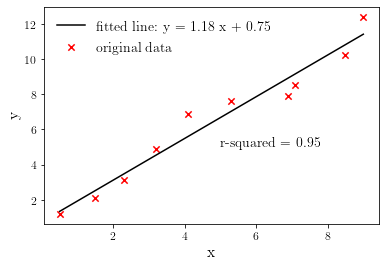

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys


#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 


plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
# note: the length of x and y vectors should be the same
x = np.array([0.5, 1.5, 2.3, 3.2, 4.1, 5.3, 6.9, 7.1, 8.5, 9.0]) 
y = np.array([1.2, 2.1, 3.1, 4.9, 6.9, 7.6, 7.9, 8.5, 10.2, 12.4]) 

# calculate the linear regression coefficients 
a0, a1, r2 = calculate_linear_regression_coef(x, y) 

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred = a0 + a1*x 

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line: y = %.2f x + %.2f'%(a1, a0)) 

plt.text(5,5,'r-squared = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

#### Linear regression exercise

- Read and understand above code, especially in the function "calculate_linear_regression_coef(...)". You need to understand how each line inside the function corresponds to the equations of linear regression.

- Use the code above to fit a linear line with the following given data points.

| points   | $x_i$       | $y_i$     |
| :---    |    :----:   |          ---: |
| 1      | 0   | 4   |
| 2      | 2   | 18  |   
| 3      | 4   | 20  | 


### Linearizable nonlinear regression

In many applications, the relationship between variables is nonlinear and thus it does not make sense to force a linear curve fitting. Nonlinear curve fitting is much more difficult and we have a separate section for it. But here, we introduce some transformation techniques which can be used to linearize nonlinear curve fitting. 

We discuss three categories of linearizable nonlinear curve fitting:
* exponential equation, e.g., population growth, radioactive decay.
\begin{equation}
y = a_0 e^{a_1 x}
\end{equation}
where $a_0$ and $a_1$ are fitting coefficients. Taking natural logarithm to both sides of the equation gives
\begin{equation}
\ln y = \ln a_0 + a_1 x
\end{equation}
Therefore, a linear curve fitting now is sought between $x$ and $\ln y$. And the interception is $\ln a_0$ and the slope is $a_1$.

* power equation, e.g., flow velocity as a function of distance to river bed, wind drag force on an object as a function of wind speed.
\begin{equation}
y = a_0 x^{a_1}
\end{equation}
Again taking natural logarithm gives
\begin{equation}
\ln y = \ln a_0 + a_1 \ln x
\end{equation}
and the linear curve fitting is sought between $\ln x$ and $\ln y$. And the interception is $\ln a_0$ and the slope is $a_1$.

* Monod-type equation (or saturation-growth-rate equation), e.g., bacteria growth, contaminant adsorption.
\begin{equation}
y = a_0 \frac{x}{a_1 + x}
\end{equation}
As a side note to the Monod equation, it is very commonly used in environmental engineering, for example for the modeling of the activated sludge for sewage treatment. Here, $y$ is the specific growth rate of microorganisms, $a_0$ is the maximum specific growth rate, $x$ is the concentration of the limiting nutrient, $a_1$ is the half-saturation constant, i.e., the value of $x$ when the growth rate is half of the maximum. 

By inversion, one can get
\begin{equation}
\frac{1}{y} = \frac{a_1}{a_0} \frac{1}{x} + \frac{1}{a_0}
\end{equation}
and the linear curve fitting is sought between $\frac{1}{y}$ and $\frac{1}{x}$ with the slope of $\frac{a_1}{a_0}$ and the interception of $\frac{1}{a_0}$.

Next, we will introduce a hand-calculation example for linearizable nonlinear regression: drag force on a sphere. Drag force $F$ (N) on a sphere moving at a speed of $V$ (m/s) in a fluid was measured. Four measurement data points were obtained. We can fit a power law equation as:
\begin{equation}
F = \alpha V^{\beta}
\end{equation}

| points   | $V$ (m/s)  | $F$ (N)    | $x_i=\ln V$  | $y_i = \ln F$  |
| :---    |    :----:   |   ---: |  ---: |  ---: |
| 1      | 1   | 1.5   |  |  |
| 2      | 2   | 9  |   |  |
| 3      | 3   | 20  |  |  |
| 4      | 4   | 45  |  |  |

By taking log operation to both sides of the equation, we can linearize the problem and the result of the regression is
\begin{equation}
F = 1.54 V^{2.415}
\end{equation}

<img src="power_regression_example_1.png" width="600"/>
<h3 align="center">Figure. Power-law regression example (the linearized version).</h3> 

<img src="power_regression_example_2.png" width="600"/>
<h3 align="center">Figure. Power-law regression example.</h3> 

The following Python code shows the fitting of a Monod-type equation. Please note that the following code calls the **calculate_linear_regression_coef(...)** function defined above. So you have to run the code cell above first. Or you can copy and paste the function definition in the following code cell. 

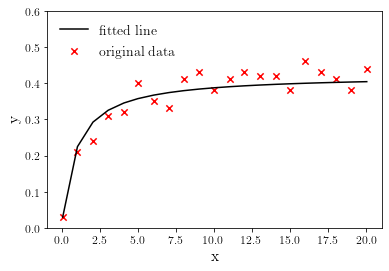

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

xinv = 1.0/x
yinv = 1.0/y

# calculate the linear regression coefficients 
alpha, beta, r2 = calculate_linear_regression_coef(xinv, yinv) 

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

#back-calculate the coefficients
a0 = 1.0/alpha
a1 = beta/alpha

# predicted value using the fitting curve
y_pred = a0 * (x / (a1 + x)) 

# plotting the regression line 
#plt.plot(x, y_pred, color = "k", label='fitted line: $y$ = %.2f $ x/(%.2f + x$)'%(a0, a1)) 
plt.plot(x, y_pred, color = "k", label='fitted line') 

#plt.text(10,0.2,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

plt.ylim([0, 0.6])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.savefig("monod_type_fitting.png",dpi=300, bbox_inches='tight', pad_inches=0)

plt.show() 

### Polynomial regression

Another common type of nonlinear curve fitting is polynomial regression. Of course, linear curve (straight line) fitting is a special case of polynomial regression (with the polynomial's degree to be one). The same procedure of least-squares criterion can be used to derive the formula. 

The popularity of polynomial regression is due to the fact that polynomials are easy to be:
- evaluated
- differentiated
- integrated

The goal of polynomial regression analysis is to find a polynomial function which fits the given set of data points best.  Given a set of data points $x_i,y_i$, $i\in(0,N-1)$, one can always fit a polynomial with the degree up to $N-1$, such that $y_i = f(x_i)$ for i = 0, 1, 2, …, N-1. 

The $m$-th order polynomial function can be written as 
\begin{equation}
   y = a_0 + a_1 x + a_2 x^2 + ... + a_m x^m + e
\end{equation}
where $a_i$, $i \in [0,m]$ are regression coefficients. $e$ is the error or residual. Again, the criterion used here for "best" fit is to minimize the sum of the squares of the residuals:
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m \right)^2
\end{equation}

The minimization of the residual can be achieve through
\begin{equation}
\frac{dError}{da_0} = -2\sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m \right)=0
\end{equation}
\begin{equation}
\frac{dError}{da_1} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m\right) x_1 \right]=0
\end{equation}
\begin{equation}
\vdots
\end{equation}
\begin{equation}
\frac{dError}{da_m} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m\right) x_i^m \right]=0
\end{equation}

This can be written as a linear equation system for the unknown coefficient vector $\mathbf{a}=[a_0, a_1, a_2, ..., a_m]^T$:
\begin{equation}
\mathbf{A} \mathbf{a} = \mathbf{b}
\end{equation}
where 
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
  n & \sum_{i=0}^{N-1} x_i & \sum_{i=0}^{N-1} x_i^2 &\cdots & \sum_{i=0}^{N-1} x_i^m \\
  \sum_{i=0}^{N-1} x_i & \sum_{i=0}^{N-1} x_i^2 & \sum_{i=0}^{N-1} x_i^3 &\cdots & \sum_{i=0}^{N-1} x_i^{m+1} \\
  \vdots & \vdots & \vdots & \vdots   \\
  \sum_{i=0}^{N-1} x_i^{m-1} & \sum_{i=0}^{N-1} x_i^m & \sum_{i=0}^{N-1} x_i^{m+1} &\cdots & \sum_{i=0}^{N-1} x_i^{2m} \\  
  \end{bmatrix}
\end{equation}
and 
\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
\sum_{i=0}^{N-1} y_i \\
\sum_{i=0}^{N-1} x_i y_i \\
\vdots \\
\sum_{i=0}^{N-1} x_i^m y_i
\end{bmatrix}
\end{equation}

It is noted that the matrix $\mathbf{A}$ is ill-conditioned. The problem gets worse as the degree of the polynomial increases. Fortunately, polynomials with very high degree are seldom sought in reality. 

The above derivation may seems abstract. Let's see a simpler, second-order (quadratic) polynomial case. The equations for the regression polynomial coefficients are
  \begin{eqnarray}
  (N) a_0 + \left(\sum x_i \right) a_1 + \left(\sum x_i^2 \right) a_2 &=& \sum y_i \\
  \left(\sum x_i \right) a_0 + \left(\sum x_i^2 \right) a_1 + \left(\sum x_i^3 \right) a_2 &=& \sum x_i y_i \\  
  \left(\sum x_i^2 \right) a_0 + \left(\sum x_i^3 \right) a_1 + \left(\sum x_i^4 \right) a_2 &=& \sum x_i^2 y_i  
  \end{eqnarray}
and in linear equation system form as
\begin{equation}
\begin{bmatrix}
(n) & \left(\sum x_i \right) & \left(\sum x_i^2 \right) \\
\left(\sum x_i \right) & \left(\sum x_i^2 \right) & \left(\sum x_i^3 \right) \\
\left(\sum x_i^2 \right) & \left(\sum x_i^3 \right) & \left(\sum x_i^4 \right)
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i \\
\sum x_i^2 y_i
\end{bmatrix}
\end{equation}  
Solve this linear equation system for the coefficient $a_0$, $a_1$, and $a_2$.

As an example, we will again use the drag force on a sphere case to demonstrate. Drag force $F$ (N) on a sphere moving at a speed of $V$ (m/s) was measured. Four measurement data points were obtained (same as in previous example). Fit a second-order polynomial equation:
\begin{equation}
F = a_0 + a_1 V + a_2 V^2
\end{equation}

The fitted quadratic polynomial is plotted in the following figure against the data points. You can compare the power-law and the quadratic polynomial regressions.
<img src="poly_regression_example_1.png" width="600"/>
<h3 align="center">Figure. Polynomial regression example.</h3> 


From the programming point of view, the formula for the entries in the matrix and right hand side vector can be written as
\begin{equation}
A_{jk} = \sum_{i=0}^{N-1} x_i^{j+k}
\end{equation}
and 
\begin{equation}
b_j = \sum_{i=0}^{N-1} x_i^j y_i
\end{equation}

The polynomial regression algorithm is implemented in the "regression_lib" library:
```python
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)

    # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a
```
and an example of use is shown below. 

The following example uses the polynomial regression function to fit the given data points. Both the original data points and the fitted polynomial are plotted for comparison.

Fitted 3-th order polynomial coefficients =  [-1995.09157362   918.53315943  -112.86130699     2.75041752]


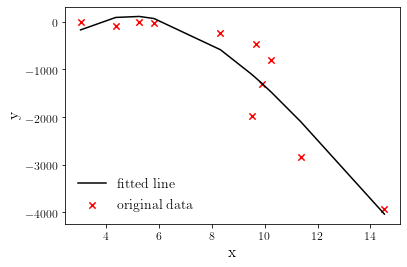

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#calcuate the coefficients for polynomial regression
#m is the degree of the polynomial.
#returns the coefficient array a for the polynomial
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)
                
    #print(A)
    #print(b)

    # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
# note: the length of x and y vectors should be the same
x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

# order of the polynomial to be fitted
m = 3

# calculate the linear regression coefficients 
a = calculate_poly_regression_coef(x, y, m) 

print("Fitted %d-th order polynomial coefficients = "%m, a)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
for i in range(m+1):
    if(i==0):
        y_pred = a[0]*np.ones(np.size(x))
    else:
        y_pred = y_pred + a[i]*x**i

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show() 

## Nonlinear regression

Up until now, we only considered linear regressions, polynomial regressions, and linearizable nonlinear regressions. For general nonlinear regression, the basic idea is the same, i.e., to determine the coefficients for the minimization of the sum of the squares of the residuals. Unlike linear regression, an iterative approach has to be used to calculate the coefficients. One such method is the Gauss-Newton method. The following is a short and concise introduction of this method. More details can be found in for example the following reference:

```
- S.C. Chapra and R. P. Canale. 2015. Numerical methods for engineers. 7th edition. McGraw Hill. 
```

Let the sought nonlinear regressional function be $f(x)$ and the data points can be written as follows (Chapra and Canale, 2015):
\begin{equation}
y_i = f(x_i; a_0,a_1, \ldots , a_m) + e_i
\end{equation}
where $a_0,a_1, \ldots , a_m$ are the $m+1$ parameters in the nonlinear function which need to be determined through least-squares regression. $e_i$ is the error for data point $i$. In vector form, the fitting parameters can be written as
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
           a_0\\
           a_1\\
           \vdots \\
           a_{N-1} 
         \end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{E} = 
\begin{bmatrix}
           e_0\\
           e_1\\
           \vdots \\
           e_{N-1} 
         \end{bmatrix}
\end{equation}


The derivation of the Gauss-Newton method is as follows. For convience, the case of two paramters $a_0$ and $a_1$, i.e., $m$ = 1, is considred. The conclusion can be easily extended to general case. The nonlinear function can expanded around the paramter values using Taylor series as
\begin{equation}
f(x_i; a_0, a_1)_{s+1} = f(x_i; a_0, a_1)_{s} + \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_0} \Delta a_0 + \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_1} \Delta a_1 + ...
\end{equation}
Higher order terms can be omitted. Here, $s$ is the iteration number. The goal of the Gauss-Newton method is to perform iterations to improve the estimates of parameters $a_0$ and $a_1$. Note that from iteration $s$ to iteration $s+1$, the parameters have been changed, thus $f(x_i; a_0, a_1)_{s+1}$ and $f(x_i; a_0, a_1)_{s}$ have different values. That is the essence of the Taylor series expansion. 

The changes of $a_0$ and $a_1$ between iterations can be written as
\begin{equation}
\Delta a_0 = a_{0,s+1}-a_{0,s}
\end{equation}

\begin{equation}
\Delta a_1 = a_{1,s+1}-a_{1,s}
\end{equation}

Plus the Taylor series expansion into the error equation above, one can get
\begin{equation}
y_i - f(x_i; a_0, a_1)_{s} = \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_0} \Delta a_0 + \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_1} \Delta a_1 + e_i
\end{equation}
for all data points $i$ = 0, 1, 2, ..., N-1. This equation can be compactly written in matrix form as
\begin{equation}
\mathbf{D} = \mathbf{J}_s \Delta \mathbf{A} + \mathbf{E}
\end{equation}
where vector $\mathbf{D}$ is made of the difference between the data point values and the predicted function values (at current iteration) as
\begin{equation}
\mathbf{D} = 
\begin{bmatrix}
           y_0 - f(x_0)_s \\
           y_1 - f(x_1)_s \\
           \vdots \\
           y_{N-1} - f(x_{N-1})_s 
         \end{bmatrix}
\end{equation}
The matrix $\mathbf{J}$ is the so-called Jacobian matrix which is made of the function $f(x)$'s partial derivatives with respect to the parameters $a_0$ and $a_1$. The matrix $\mathbf{J}$ has a dimension of $N \times 2$ because we have $N$ data points and 2 parameters. 
\begin{equation}
\mathbf{J}_s = 
   \begin{bmatrix}
           \partial f(x_0; a_0, a_1)_{s}/\partial a_0  & \partial f(x_0; a_0, a_1)_{s}/\partial a_1\\
           \partial f(x_1; a_0, a_1)_{s}/\partial a_0  & \partial f(x_1; a_0, a_1)_{s}/\partial a_1\\
           \vdots \\
           \partial f(x_{N-1}; a_0, a_1)_{s}/\partial a_0  & \partial f(x_{N-1}; a_0, a_1)_{s}\partial a_1
   \end{bmatrix}
\end{equation}

The vector $\Delta \mathbf{A}$ has a length of 2 (because we have 2 parameters) and is defined as
\begin{equation}
\Delta \mathbf{A} = 
   \begin{bmatrix}
           \Delta a_0 \\
           \Delta a_1 
   \end{bmatrix}
\end{equation}

This vector equation can be treated as a linear regression with data points $(\mathbf{J}, \mathbf{D})$ and $\Delta \mathbf{A}$ is the linear regression parameter vector. \mathbf{E} is the error. Using the same least-squares regression to this problem, one can write the nomal equation (in vector form of course) as
\begin{equation}
\left( \mathbf{J}_s^T \mathbf{J}_s \right) \Delta \mathbf{A} = \mathbf{J}_s^T   \mathbf{D}
\end{equation}
This is a $2 \times 2$ linear equation system. It can be solved for $\Delta \mathbf{A}$ as
\begin{equation}
\Delta \mathbf{A} = \left( \mathbf{J}_s^T \mathbf{J}_s \right)^{-1} \mathbf{J}_s^T   \mathbf{D}
\end{equation}


The demonstrate the nonlinear regression method, the following example fits a Monod-type equation (or saturation-growth-rate equation) with a given set of data points:
\begin{equation}
y = a_0 \frac{x}{a_1 + x}
\end{equation}
Here, $y$ is the specific growth rate of microorganisms, $a_0$ is the maximum specific growth rate, $x$ is the concentration of the limiting nutrient, $a_1$ is the half-saturation constant, i.e., the value of $x$ when the growth rate is half of the maximum. 

The residual is for each data points is
\begin{equation}
e_i = y_i - a_0 \frac{x_i}{a_1 + x_i}
\end{equation}
Then the Jacobian $J$, which is $e_i$ taking derivatieve with respect to $a_j$, $j$=0 or 1.
\begin{equation}
\frac{\partial e_i}{\partial a_0} = -\frac{x_i}{a_1+x_i}
\end{equation}
and 
\begin{equation}
\frac{\partial e_i}{\partial a_1} = \frac{a_0 x_i}{\left(a_1+x_i\right)^2}
\end{equation}

The Gauss-Newton method iteration to update the paramters $a_j$ is then
\begin{equation}
\mathbf{A}^{s+1} = \mathbf{A}^{s+1} + \left(\mathbf{J}^T \mathbf{J} \right)^{-1} \mathbf{J}^T \mathbf{e}\left(\mathbf{A}^{s+1} \right)
\end{equation}
where $s$ is the iteration number and $s$ = 0, 1, 2, $\ldots$. 

As in any iterative schemes, there should be a stopping criterion $\epsilon$. For example, one criterion can be the relative error between two successive iterations:
\begin{equation}
\left| \frac{a_j^{s+1}-a_j^{s}}{a_j^{s+1}}  \right| < \epsilon
\end{equation}

The Python implementation of the algorithm is as follows:

Initial guess for the two parameters: 
 [[0.2]
 [1. ]]
iter =  0
(abs((A[0]-A_old[0])/A[0]) =  [0.56025567]
(abs((A[1]-A_old[1])/A[1]) =  [0.4593264]
iter =  1
(abs((A[0]-A_old[0])/A[0]) =  [0.00394693]
(abs((A[1]-A_old[1])/A[1]) =  [0.30831006]
iter =  2
(abs((A[0]-A_old[0])/A[0]) =  [0.00198786]
(abs((A[1]-A_old[1])/A[1]) =  [0.03050907]
iter =  3
(abs((A[0]-A_old[0])/A[0]) =  [0.00013531]
(abs((A[1]-A_old[1])/A[1]) =  [0.00109377]
iter =  4
(abs((A[0]-A_old[0])/A[0]) =  [3.28763122e-06]
(abs((A[1]-A_old[1])/A[1]) =  [2.35887229e-05]
iter =  5
(abs((A[0]-A_old[0])/A[0]) =  [6.97212526e-08]
(abs((A[1]-A_old[1])/A[1]) =  [4.98374892e-07]
Final results for the two parameters: 
 [[0.45758489]
 [1.45980935]]


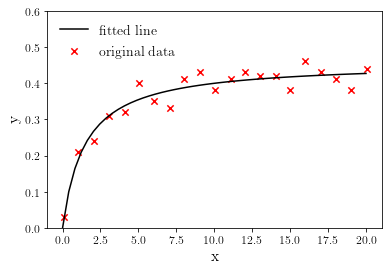

In [11]:
import scipy
import numpy as np
import math
import scipy.misc
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#data points
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

#max iterations
max_iter = 200

#convergence criterion for the fitting parameters
eps = 1E-6

rows = len(x) #number of data points
cols = 2      #two parameters a0 and a1

A = np.array([[.2],[1.0]]) # original guess for A
print("Initial guess for the two parameters: \n",A)

J = np.zeros((rows,cols)) # Jacobian matrix from r
r = np.zeros((rows,1)) #r equations

# component of the Jacobian matrix: df_da0
def df_da0(A1,xi):
    return -(xi/(A1+xi))

# component of the Jacobian matrix: df_da1
def df_da1(A0,A1,xi):
    return ((A0*xi)/((A1+xi)**2))

#calculate the residual e for a given data points with current parameters
def residual(x,y,A0,A1):
    return (y - ((A0*x)/(A1+x)))

#the Gauss-Newton method iteration
iter = 0
while iter <= max_iter:
    print("iter = ", iter)
    A_old = A        #save the parameter values from previous iteration
        
    #calculate Jacobian matrix J and residual vector e for current iteration.
    for j in range(rows):                      #loop over all data points
        r[j,0] = residual(x[j],y[j],A[0],A[1]) #
        J[j,0] = df_da0(A[1],x[j])
        J[j,1] = df_da1(A[0],A[1],x[j])

    Jt =  J.T    #get the transpose of J
    A = A - np.dot(np.dot(np.linalg.inv(np.dot(Jt,J)),Jt),r)
    
    #convergence check
    print("(abs((A[0]-A_old[0])/A[0]) = ", (abs((A[0]-A_old[0])/A[0])))
    print("(abs((A[1]-A_old[1])/A[1]) = ", (abs((A[1]-A_old[1])/A[1])))
    
    if((abs((A[0]-A_old[0])/A[0])<eps) or (abs((A[1]-A_old[1])/A[1])<eps)):
        break

    iter += 1

print("Final results for the two parameters: \n", A)    
    
#plot the data and fitted curve
# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
x_pred = np.linspace(0,20,50)
y_pred = A[0][0]*x_pred/(A[1][0]+x_pred) 
np.reshape(y_pred, (1,50))

# plotting the regression line 
plt.plot(x_pred, y_pred, color = "k", label='fitted line') 

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

plt.ylim([0, 0.6])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

For comparison, the following code uses the "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library, which uses non-linear least squares to fit a function for a give set of data. You can compare the resulted values of $a_0$ and $a_1$ with those from above. They should match. 

In [12]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#data points
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

#define the fitting function
def f(x, a0, a1):
    return a0*x/(a1+x)

fitting_parameters, covariance = curve_fit(f, x, y)
a0, a1 = fitting_parameters

print("a0, a1 = ", a0, a1)

a0, a1 =  0.4575848670975289 1.4598088795953368


## Interpolation

The definition of interpolation is as follows: given some data points (assumed precise), estimate the values inbetween them.  
For given $N$ data points, there is one and only one polynomial which fits these data. Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$.

The most commonly used method is polynomial interpolation. For the given $N$ data points, you can always fit a unique ${N-1}^{th}$-order polynomial
 \begin{equation}
 f(x) = a_0 +a_1 x + a_2 x^2 + \ldots + a_n x^{N-1}
 \end{equation}
For example, two points ($N$=2) can fit a linear line; three points ($N$=3) can fit a parabola.

One naive way to fit this $N-1$th-order polynomial is to plug in all the data points into the polynomial and solve for the coefficents. The problem is that as $N$ increases, the resulted linear equation system becomes more ill-conditioned and thus is more subject to numerical errors. Therefore, this brutal force approach is seldon used when $N$ is large.

Two polynomial interpolation methods will be introduced:
- Newton's divided-difference method
- Lagrange method

### Newton's finite divided difference method

The method above involves the solution of a linear system. It is a brutal force method because the matrix $\mathbf{A}$ becomes ill-conditioned as the degree of the polynomial increases. An alternative method is the Newton's divided difference method.

The way to derive the Newton's divided difference method is to start with first order (linear) and second-order (quadratic) polynomials and then make a generalization.

* First-order (linear) polynomial
    Two data points are needed to fit a first-order polynomial. Let's note them as ($x_0$, $y_0$) and ($x_1$, $y_1$). Assume the linear interpolant has the form of 
\begin{equation}
f_1(x) = b_0 + b_1(x-x_0)
\end{equation}
The coefficients $b_0$ and $b_1$ are unknown and needed to be solved for. 

Plugging the two given data points, one can get
\begin{eqnarray}
b_0 + b_1(x_0 - x_0) &=& y_0 \\
b_0 + b_1(x_1 - x_1) &=& y_1
\end{eqnarray}
It is easy to solve for the two coefficients:
\begin{eqnarray}
b_0 &=& y_0 \\
b_1 &=& \frac{y_1 - y_0}{x_1 - x_0}
\end{eqnarray}

* Second-order (quadratic) polynomial
    Three data points are needed to fit a second-order polynomial. Let's note them as ($x_0$, $y_0$), ($x_1$, $y_1$), and ($x_2$, $y_2$). Assume the quadratic interpolant has the form of 
\begin{equation}
f_2(x) = b_0 + b_1(x-x_0) + b_2 (x-x_0)(x-x_1)
\end{equation}
The three coefficients $b_0$, $b_1$ and $b_2$ are unknown and needed to be solved for. 

Plugging the three given data points, one can get
\begin{eqnarray}
b_0 + b_1(x_0 - x_0)+ b_2 (x_0-x_0)(x_0-x_1) &=& y_0 \\
b_0 + b_1(x_1 - x_1)+ b_2 (x_1-x_0)(x_1-x_1) &=& y_1 \\
b_0 + b_1(x_2 - x_1)+ b_2 (x_2-x_0)(x_2-x_1) &=& y_2
\end{eqnarray}
It is easy to solve for the three coefficients:
\begin{eqnarray}
b_0 &=& y_0 \\
b_1 &=& \frac{y_1 - y_0}{x_1 - x_0} \\
b_2 &=& \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0}
\end{eqnarray}

* The $n$-th order polynomial
    $n+1$ data points are needed to fit a $n$-th order polynomial. Let's note them as ($x_i$, $y_i$), $i$ = 0, 1, 2, ..., n. Notice that the coefficients derived above are approximations of the derivatives, also termed finite divided differences. We note
\begin{equation}
b_0 = f[x_0] = y_0
\end{equation}
\begin{equation}
b_1 = f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}
\end{equation}
\begin{equation}
b_2 = f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_0}
\end{equation}

\begin{equation}
\vdots
\end{equation}

\begin{equation}
b_{n-1} = f[x_{n-1}, x_{n-2}, \cdots, x_0]
\end{equation}
\begin{equation}
b_{n} = f[x_{n}, x_{n-1}, \cdots, x_0]
\end{equation}

In fact, the following recursive relation holds
\begin{eqnarray}
b_m &=& f[x_m, x_{m-1}, \cdots, x_0] \\
    &=& \frac{f[x_m, x_{m-1}, \cdots, x_1] - f[x_{m-1}, x_{m-2}, \cdots, x_0]}{x_m - x_0}
\end{eqnarray}

Assume the $n$-th order polynomial interpolant has the form of 
\begin{equation}
f_n(x) = b_0 + b_1(x-x_0) + b_2 (x-x_0)(x-x_1) + ... + b_n (x-x_0)(x-x_1)\cdots(x-x_{n-1})
\end{equation}

\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2,x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3,x_2,x_1,x_0]\\
x_2 & y_2 &             & f[x_3,x_2,x_1] &             & f[x_4,x_3,x_2,x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4,x_3,x_2,x_1]\\
x_3 & y_3 &             & f[x_4,x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}

The algorithm to calculate the Newton's divided difference coefficients is listed in the following figure and implemented in the code below. 

<img src="Newton_divided.png" width="600">


Value at  7 is  13.47


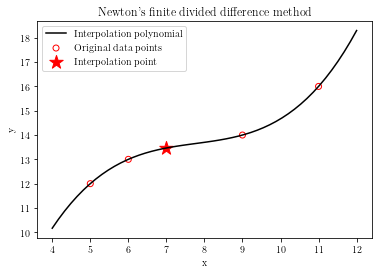

In [5]:
#source: https://www.geeksforgeeks.org/newtons-divided-difference-interpolation-formula/

import numpy as np
import matplotlib.pyplot as plt

# Function to find the product term
def proterm(i, value, x):
    pro = 1.0
    for j in range(i):
        pro = pro * (value - x[j])
        
    return pro

# Function for calculating
# divided difference table
def dividedDiffTable(x, y, n):
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                        (x[j] - x[i + j]))
    return y

# Function for applying Newton’s
# divided difference formula
def applyFormula(value, x, y, n):
    sum = y[0][0]
    
    for i in range(1, n):
        sum = sum + (proterm(i, value, x) * y[0][i])

    return sum;

# Driver Code

# number of inputs given
n = 4
y = np.zeros([n,n])
x = [ 5, 6, 9, 11 ];

# y[][] is used for divided difference
# table where y[][0] is used for input
y[0][0] = 12
y[1][0] = 13
y[2][0] = 14
y[3][0] = 16

# calculating divided difference table
y=dividedDiffTable(x, y, n)

# value to be interpolated
x_value = 7
y_value = round(applyFormula(x_value, x, y, n), 2)
# printing the value
print("Value at ", x_value, "is ", y_value)

#plot the original data points, fitted polynomial, and the interpolated point
plt.scatter(x,y[:,0], marker = 'o', facecolors='none', edgecolors='r', label='Original data points')  #make a scatter plot with the loaded data
plt.scatter(x_value,y_value, c="r", s=200, marker = '*', label='Interpolation point') 

x_fit = np.linspace(4,12,50)
y_fit = np.zeros(50)
for i in range(50):
    y_fit[i] = applyFormula(x_fit[i], x, y, n)
    
plt.plot(x_fit,y_fit,c='k',label="Interpolation polynomial")    

plt.xlabel('x')
plt.ylabel('y')
plt.title("Newton's finite divided difference method")
plt.legend()
plt.show()


#### Lagrange polynomial interpolation

In Newton's method, the finite divided differences ${f[\ldots]}$ have to be calculated. The Lagrange method is a re-formulation of the Newton's method to avoid the calculation of ${f[\ldots]}$. The Lagrange formula is
 \begin{equation}
 f_n(x) = \sum_{i=0}^{n} L_i(x) f(x_i)
 \end{equation}
 where $L_i(x)$ is the Lagrange basis polynomial which has the form of
\begin{eqnarray}
L_i(x) &=& \prod_{\begin{smallmatrix}0\le j\le n\\ j\neq i\end{smallmatrix}} \frac{x-x_j}{x_i-x_j} \\
       &=& \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{j-1})}{(x_i-x_{j-1})} \frac{(x-x_{j+1})}{(x_i-x_{j+1})} \cdots \frac{(x-x_n)}{(x_i-x_n)}
\end{eqnarray} 
Here, $\prod$ is the product (multiplication) operator. Let's look at some simple, low-order polynomial interpolation formulas using Lagrange method. 

The Lagrange formula for linear interpolation has the form of
 \begin{equation}
 f_1(x) = \frac{x-x_1}{x_0-x_1} f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)
 \end{equation}
and the the Lagrange formula for quadratic interpolation has the form of
  \begin{eqnarray}
 f_2(x) &=&   \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} f(x_0) \\
        & & + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} f(x_1) \\ 
        & & + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} f(x_2)
  \end{eqnarray}
  
Note the following observations: 
- They are linear and quadratic functions.
- Each Lagrange term $L_i(x)$ = 1 at $x=x_i$ and =0 at other points.
- Thus, this is the unique polynomial to interpolate the data points.

For quadratic formula, the base polynomials are
\begin{equation}
L_0(x) =  \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}, \quad L_1(x) = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} , \quad L_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} 
\end{equation}
and the interpolation formulas is
\begin{equation}
f_{{2}}(x) = L_0(x)f(x_0) + L_1(x)f(x_1) + L_2(x)f(x_2)
\end{equation}
The following figure plots the base polynomials the values of them at interpolation points.
<img src="lagrange_quadratic_base.png" width="800"/>
<h3 align="center">Figure. Lagrange base polynomials for quadratic formula.</h3> 

To show how the Lagrange method works, the following is some manual calculation examples. 

- Fit a quadratic polynomial with the following data:

| $i$      | $x_i$ | $y_i$     |
| :---        |    :----:   |          ---: |
| 0      | 1       | 10   |
| 1      | 3       | 54   |
| 2      | 4       | 91   |


- Fit a 4-th order polynomial with the following data:

| $i$      | $x_i$ | $y_i$     |
| :---        |    :----:   |          ---: |
| 0      | 1       | 9   |
| 1      | 3       | 407   |
| 2      | 4       | 1143   |
| 3      | 6       | 5099   |
| 4      | 7       | 9099   |




#### Overfitting of polynomials

One potential problem of polynomial curve fitting is overfitting. Here is one example due to the German mathematition Carl David Tolmé Runge (who also happen to be the one who invented the Runge-Kutta method for solveing differential equations). Let's sample evenly distributed $N$ points on the function 
\begin{equation}
   f(x) = \frac{1}{1 + x^2}
\end{equation}
in the interval $[-10, +10]$. With these $N$ points, you can fit a polynomial up to the degree of $N-1$. You may think that the more points to sample, i.e., larger $N$, the better the polynomial will fit with the curve of the function $f(x)$. Unfortunately, it is not the case for this function. The following code demonstrate this. By changing the number of data points $N$, you can see how the polynomial fitting behaves. 

Three $N$ values, i.e., 10, 15, and 20 were tried. The resulted corresponding polynomial fitting curves are shown in the following figures. For $N$ = 15 and 20, two figures are shown with one in the zoomed in region. For this particular case, the problem is always at the two ends. Large deviations and oscillations can be observed as $N$ increases. In the middle region, the polynomial fitting curve approaches to the function as $N$ increases. 

Polynomial curve fitting is sometime used with other numerical methods, for example numerical integration. From this example, it is clear that higher order polynomial curve fitting may not yield higher accuracy. Sometime, it deteriates the accuracy. 

<img src="poly_N10.png" width="400"/>

<img src="poly_N15.png" width="800"/>

<img src="poly_N20.png" width="800"/>

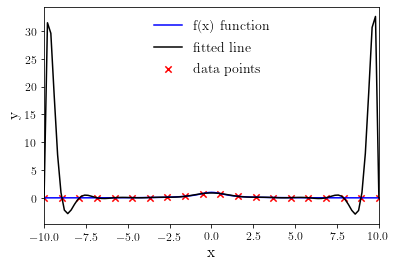

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#calcuate the coefficients for polynomial regression
#m is the degree of the polynomial.
#returns the coefficient array a for the polynomial
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)
                
     # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# data points
# note: the length of x and y vectors should be the same
N=20   #number of data points    <----  change this number to see the effect: N = 10,15,20, etc.
x = np.linspace(-10,10,N)
y = 1.0/(1.0+x**2)

# order of the polynomial to be fitted (=N-1)
m = N-1

# calculate the linear regression coefficients 
a = calculate_poly_regression_coef(x, y, m) 

#print("Fitted %d-th order polynomial coefficients = "%m, a)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='data points') 

# plotting the original function with more data points
x_plot = np.linspace(-10,10,101)
y_plot = 1.0/(1.0+x_plot**2)
plt.plot(x_plot, y_plot, color = "b", label='f(x) function') 

# x values for predicted y values
x_pred = np.linspace(-10,10,100)

# predicted value using the fitting curve
for i in range(m+1):
    if(i==0):
        y_pred = a[0]*np.ones(np.size(x_pred))
    else:
        y_pred = y_pred + a[i]*x_pred**i

# plotting the regression line 
plt.plot(x_pred, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#set the limit for the x and y axes
plt.xlim([-10,10])
#plt.ylim([-1,1.2])

plt.legend(loc='upper center',fontsize=14,frameon=False)

#plt.savefig("data_fitting_N20_1.png",dpi=300, bbox_inches='tight', pad_inches=0)

plt.show() 

# Python built-in curve fitting and interpolation functions and capabilities

There are numerous choices in terms of curve fitting and interpolation in Python. The most notable one is SciPy. It has a full webpage with information on this topic:
[Introduction of interpolation in SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html). These functions include 1D, 2D, and multi-dimension interpolations; linear and nonlinear curve fitting; specialzied polynomial curve fitting; etc. Although not covered in this course, it also implements the Spline interpolations. 

The following demonstrate some usages of these built-in functions.


* Numpy's "polyfit(...)" function for polynomial regression. 
    The following example use a set of data points and calls the "polyfit" function in Numpy which takes the data set and desired polynomial order as input and returns the polynomial coefficients. The example also utilizes the "poly1d" function in Numpy which constructs a one-dimensional polynomial (meaning a polynomial function of single variable) from given coefficients. The constructed polynomial function can then be used to evaluate function values at given $x$.

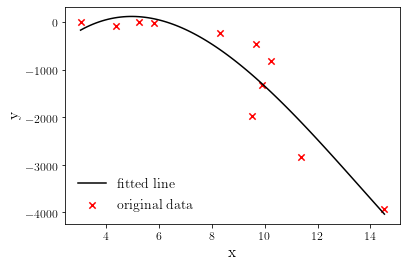

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

#set the degree of polynomial and call polyfit to get the coefficients.
degree = 3
coeffs = np.polyfit(x, y, degree)

#get the fitted function
f_fit = np.poly1d(coeffs)

x_new = np.linspace(x[0], x[-1], 100)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred =f_fit(x_new)

# plotting the regression line 
plt.plot(x_new, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show() 


----------------------------------
* The "least_squares" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library: it uses non-linear least squares to fit a function for a given set of data points. Note that there is also the legacy "leastsq(...)" function available in SciPy. The newer version of the least squares regression "least_squares(...)" can specify the upper and lower bounds for regression parameters. You should use the newer version unless you have a special reason to use the old version "leastsq(...)". 

\begin{equation}
y=A\left(1-e^{-x/A} \right)
\end{equation}

curve fitting coefficients =  [  0.99856863 223.14897213]


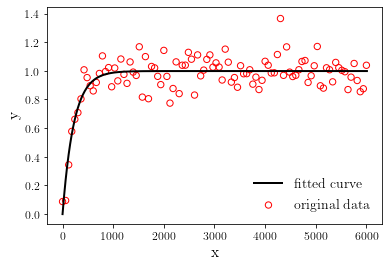

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#define the function 
def func(coeffs, x):
    #print(coeffs)
    return (coeffs[0]*(1 - np.exp(-x/(coeffs[1]+1E-6))))

#define the residual function 
def residual_func(coeffs, x, y):
    return (func(coeffs, x) - y)

#generate some data (function value + some noise)
def gen_data(x, A, noise=0):
    return (func(A, x) + np.random.randn(len(x))*noise)

xmax = 6000    #upper bound for x
N = 100        #number of data points to sample (to be used for curve fitting)
A = np.array([1.0, 200.0])      #true model parameters
noise = 0.1    #model parameter for noise level (generation of training data)

#starting guess of model parameter values
coeffs0 = np.array([0.2, 50.0])

#call the data generation function
x_train = np.linspace(0, xmax, N)
y_train = gen_data(x_train, A, noise)

#plot the data points
plt.scatter(x_train, y_train, marker = "o", s = 40, edgecolor = "r", facecolor='None', label='original data') 

#curve fitting by calling the least_squares(...) function.
r = scipy.optimize.least_squares(residual_func, coeffs0, args=(x_train, y_train))
print("curve fitting coefficients = ", r.x)

#calculate the fitted curve
x_fit   = np.linspace(-0.1, xmax+10, 1000)
y_fit = gen_data(x_fit, r.x, 0.0)

#plot the fitted curve
plt.plot(x_fit, y_fit, lw=2, c='k', label="fitted curve")

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower right',fontsize=14,frameon=False)    

plt.show()

-------------------------------
* The "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library: it uses non-linear least squares to fit a function for a given set of data. 

The following example code fits a curve in the form of 
\begin{equation}
  f(x) = ae^{-bx}+c
\end{equation}
where $a$, $b$, and $c$ are fitting coefficients. 

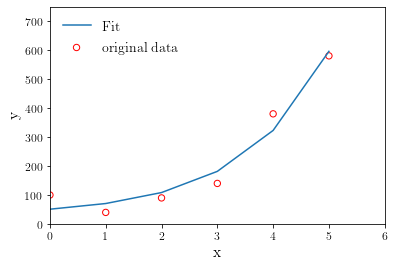

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

def exponential_func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([100, 40, 90, 140, 380, 580])
fitting_parameters, covariance = curve_fit(exponential_func, x, y)
a, b, c = fitting_parameters

plt.scatter(x, y, marker = "o", s = 40, edgecolor = "r", facecolor='None', label='original data') 

plt.plot(x, exponential_func(x, *fitting_parameters), '-', label='Fit')

plt.axis([0, 6, 0, 750])

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)    

plt.show()

--------------------
* Numpy's "interp(...)" function: which performs one-dimensional, piecewise linear interpolation with a given set of data points ($x_i$, $f_i$), and return the interpolated function value at the given $x$. For the given data points, the $x_i$ has to be in ascending order. 

In the following example code, it plots the original data with line and cross. The interpolated data points are also plotted as filled circles. 

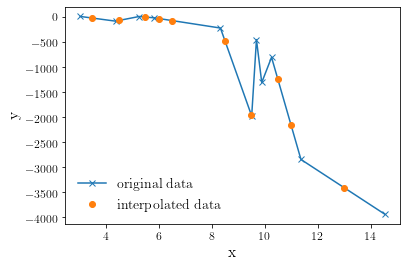

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

xvals = np.array([3.5, 4.5, 5.5, 6.0, 6.5, 8.5, 9.5, 10.5, 11.0, 13.0])
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, '-x', label='original data')
plt.plot(xvals, yinterp, 'o', label='interpolated data')

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show()